Successfully opened the previous simulation.


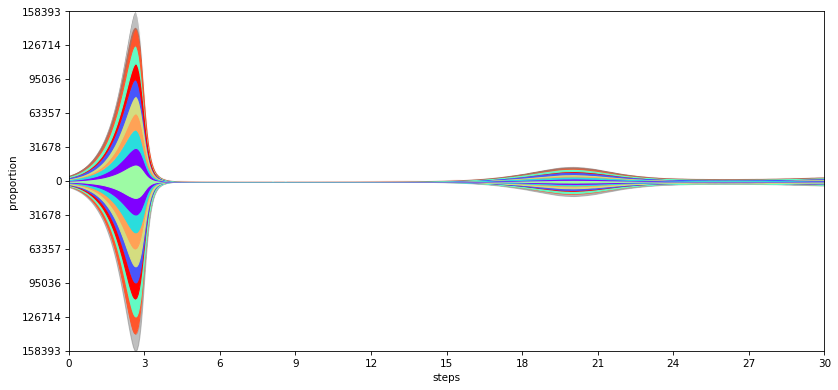

In [1]:
from graphing import get_sim, fish

sim = get_sim("../sim_data/sim.pickle_UnifBinding0.5")
plot = fish(sim, "tumour")

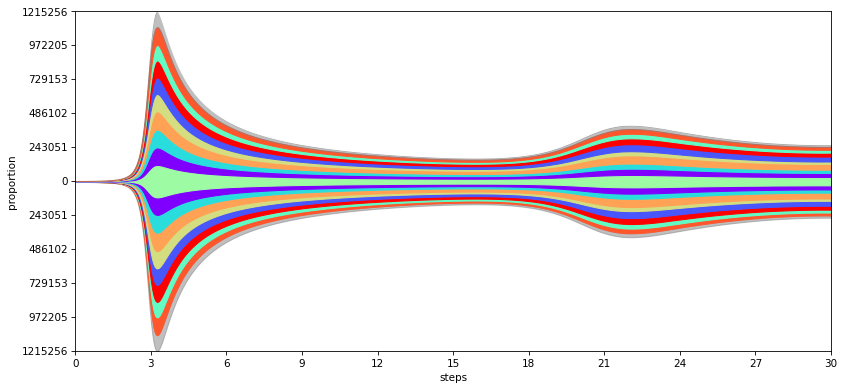

In [2]:
plot = fish(sim, "CTL")

Is it worth including this?

<module 'matplotlib.pyplot' from 'c:\\Users\\akesh\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

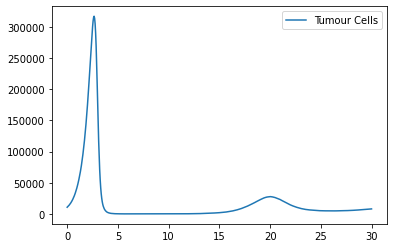

In [ ]:
from graphing import graph_tumour

graph_tumour(sim)

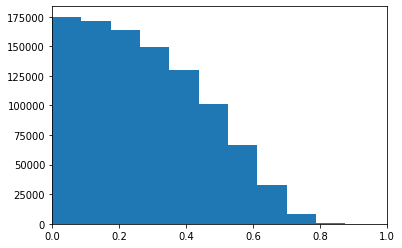

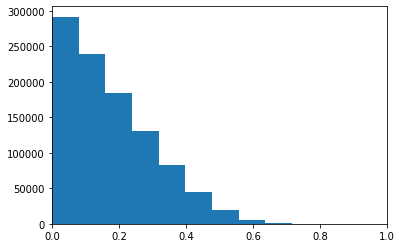

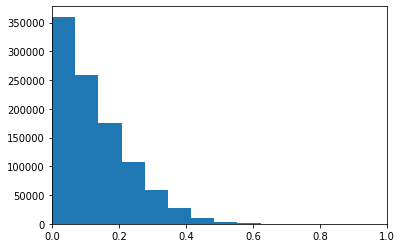

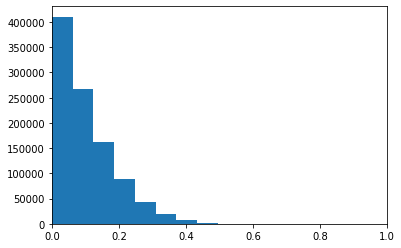

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def get_random_matrix_affinity(parameter):
    """
    Generate entries from an exponential distribution (this mimics the idea of not having most phenotypes bind). But we have renormalised and modified to keep within [0,1]
    """
    w = 1000
    h = 1000
    exp_matrix = np.random.exponential(1 / parameter, (w, h))
    norm_matrix = 1 - (1 / (1 + exp_matrix))
    return norm_matrix

values = [ 2, 4, 6, 8]

for i in range(len(values)):
    value = values[i]
    figure, ax = plt.subplots()
    ax.set_xlim(0,1)
    plt.hist(get_random_matrix_affinity(value).flatten())

In [3]:
from inputs import read_phenotypes

TCRs = read_phenotypes("config/real_sample_TCRs.txt")
peptides = read_phenotypes("config/real_sample_peptides.txt")


In [7]:
TCRs

['CASSLHWGLSEKLFF',
 'CASGTGENTEAFF',
 'CASSLGTYGYTF',
 'CATSDSRQGDASGELFF',
 'CASFGSNQPQHF',
 'CASSSRQAGTNEKLFF',
 'CSAREPQAGRYGYTF',
 'CASRDSNQPQHF',
 'CASSLEANTEAFF',
 'CASSFSLLGGELFF',
 'CSVEDLTSQGPIKNTEAFF',
 'CASRWSNEKLFF',
 'CASSQQYSNQPQHF',
 'CASRPRASGGPYEQYF',
 'CATSSTPTSGGNEQFF',
 'CASSKTGTFSGYGYTF',
 'CASRFPGTGGAGDPYEQYF',
 'CASSMTGGGYNEQFF',
 'CATSGPNALAGKQFF',
 'CASSLAKLAGGRNTEAFF',
 'CASSHSSGSSYNEQFF']

In [21]:
from phenotype import SequencePhenotypeStructure, Phenotype, SequencePhenotypeInteractionData

TCR_struct = SequencePhenotypeStructure(TCRs)
peptide_struct = SequencePhenotypeStructure(peptides)

def get_distances(struct : SequencePhenotypeStructure):
    dists = []
    d = SequencePhenotypeInteractionData(0, 0)
    for id in struct.ids:
        phen = Phenotype(struct, id)
        for id_ in struct.ids:
            phen_ = Phenotype(struct, id_)
            cur_dist = SequencePhenotypeStructure.get_sequence_distance(phen, phen_, 0, d)
            dists.append(cur_dist)
    return dists

def get_distances_from_sequences(sequences):
    struct = SequencePhenotypeStructure(sequences)
    return get_distances(struct)


(array([ 21.,   2.,   6.,   8.,  12.,  98.,  92., 114.,  46.,  42.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

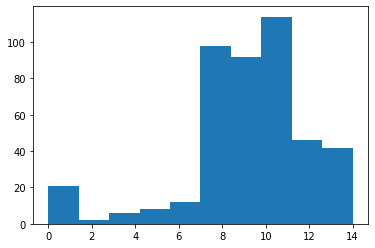

In [19]:
import matplotlib.pyplot as plt
TCR_dists = get_distances(TCR_struct)
plt.hist(TCR_dists)

(array([12.,  0.,  0.,  0.,  0.,  0.,  6., 34., 50., 42.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

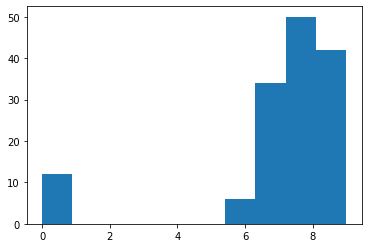

In [20]:
peptide_dists = get_distances(peptide_struct)
plt.hist(peptide_dists)

In [60]:
import numpy as np

peptide_avg = sum(peptide_dists)/len(peptide_dists)
norm_peptide_dists = np.array(peptide_dists) / peptide_avg

In [61]:
TCR_avg = sum(TCR_dists)/len(TCR_dists)
norm_TCR_dists = np.array(TCR_dists)/(TCR_avg)

Normalise i.e. place the mean value at 1.

(array([12.,  0.,  0.,  0.,  0.,  0.,  6., 34., 50., 42.]),
 array([0.        , 0.12319392, 0.24638783, 0.36958175, 0.49277567,
        0.61596958, 0.7391635 , 0.86235741, 0.98555133, 1.10874525,
        1.23193916]),
 <BarContainer object of 10 artists>)

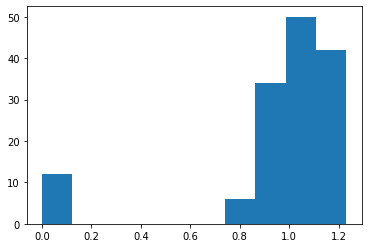

In [55]:
plt.hist(norm_peptide_dists)

(array([ 21.,   2.,   6.,   8.,  12.,  98.,  92., 114.,  46.,  42.]),
 array([0.      , 0.153125, 0.30625 , 0.459375, 0.6125  , 0.765625,
        0.91875 , 1.071875, 1.225   , 1.378125, 1.53125 ]),
 <BarContainer object of 10 artists>)

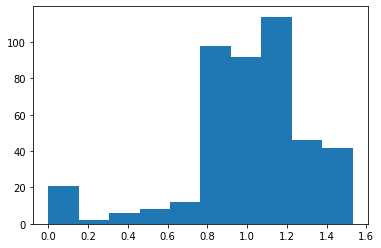

In [56]:
plt.hist(norm_TCR_dists)

In [22]:
more_TCRs = read_phenotypes("config/TCRs_from_TULIP.txt")
more_peptides = read_phenotypes("config/peptides_from_TULIP.txt")

In [25]:
more_TCRs_dists = get_distances_from_sequences(more_TCRs)

(array([  1182.,   5382.,  11874.,  78014.,  83748., 209358., 119610.,
         19876.,   9084.,    628.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

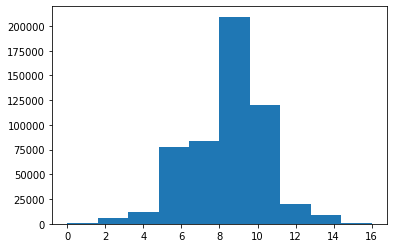

In [23]:
plt.hist(more_TCRs_dists)

(array([1.480e+02, 4.000e+00, 1.600e+01, 4.000e+00, 3.000e+01, 2.100e+02,
        1.336e+03, 5.176e+03, 8.852e+03, 6.128e+03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

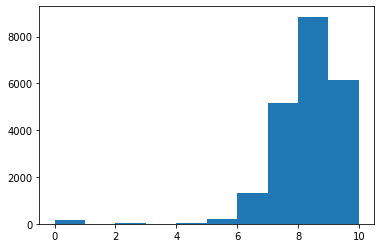

In [24]:
plt.hist(get_distances_from_sequences(more_peptides))

Now let's look at the scaling for different parameters

In [27]:
def get_scalings(struct : SequencePhenotypeStructure, rho, rho_tilde):
    dists = []
    d = SequencePhenotypeInteractionData(0, rho_tilde)
    for id in struct.ids:
        phen = Phenotype(struct, id)
        for id_ in struct.ids:
            phen_ = Phenotype(struct, id_)
            cur_dist = SequencePhenotypeStructure.get_sequence_scaling(phen, phen_, 0 ,d, rho)
            dists.append(cur_dist)
    return dists


(array([ 88., 206.,  98.,  12.,   8.,   6.,   0.,   2.,   0.,  21.]),
 array([0.41666667, 0.475     , 0.53333333, 0.59166667, 0.65      ,
        0.70833333, 0.76666667, 0.825     , 0.88333333, 0.94166667,
        1.        ]),
 <BarContainer object of 10 artists>)

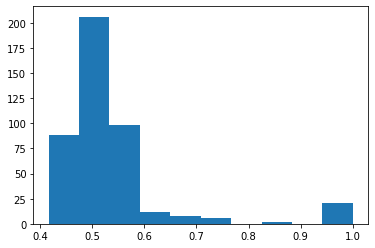

In [46]:
TCR_scalings = get_scalings(TCR_struct, rho=0.1, rho_tilde=1)
plt.hist(TCR_scalings)

(array([126.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  12.]),
 array([0.27027027, 0.34324324, 0.41621622, 0.48918919, 0.56216216,
        0.63513514, 0.70810811, 0.78108108, 0.85405405, 0.92702703,
        1.        ]),
 <BarContainer object of 10 artists>)

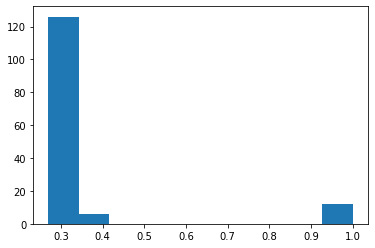

In [43]:
peptide_scalings = get_scalings(peptide_struct, rho=0.3, rho_tilde=1)
plt.hist(peptide_scalings)

Can we normalise these?

(array([ 88., 206.,  98.,  12.,   8.,   6.,   0.,   2.,   0.,  21.]),
 array([0.41666667, 0.475     , 0.53333333, 0.59166667, 0.65      ,
        0.70833333, 0.76666667, 0.825     , 0.88333333, 0.94166667,
        1.        ]),
 <BarContainer object of 10 artists>)

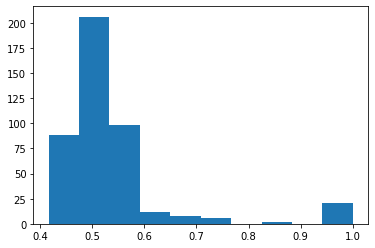

In [67]:
rho = 0.1 / TCR_avg

TCR_scalings = get_scalings(TCR_struct, rho=0.1, rho_tilde=1)
plt.hist(TCR_scalings)

(array([42., 50., 34.,  6.,  0.,  0.,  0.,  0.,  0., 12.]),
 array([0.89031821, 0.90128639, 0.91225457, 0.92322275, 0.93419093,
        0.94515911, 0.95612729, 0.96709546, 0.97806364, 0.98903182,
        1.        ]),
 <BarContainer object of 10 artists>)

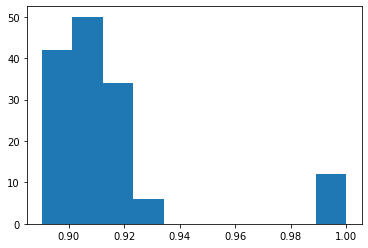

In [68]:
rho = 0.1 / peptide_avg
peptide_scalings = get_scalings(peptide_struct, rho=rho, rho_tilde=1)
plt.hist(peptide_scalings)

#### Can we normalise attempt 2

(array([ 88., 206.,  98.,  12.,   8.,   6.,   0.,   2.,   0.,  21.]),
 array([0.41666667, 0.475     , 0.53333333, 0.59166667, 0.65      ,
        0.70833333, 0.76666667, 0.825     , 0.88333333, 0.94166667,
        1.        ]),
 <BarContainer object of 10 artists>)

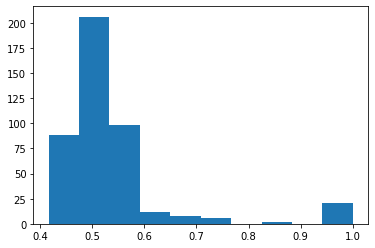

In [69]:
rho = 0.1 / max(TCR_dists)

TCR_scalings = get_scalings(TCR_struct, rho=0.1, rho_tilde=1)
plt.hist(TCR_scalings)

(array([42., 50., 34.,  6.,  0.,  0.,  0.,  0.,  0., 12.]),
 array([0.90909091, 0.91818182, 0.92727273, 0.93636364, 0.94545455,
        0.95454545, 0.96363636, 0.97272727, 0.98181818, 0.99090909,
        1.        ]),
 <BarContainer object of 10 artists>)

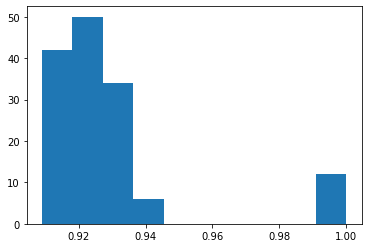

In [70]:
rho = 0.1 / max(peptide_dists)
peptide_scalings = get_scalings(peptide_struct, rho=rho, rho_tilde=1)
plt.hist(peptide_scalings)